In [2]:
from sklearn import datasets,linear_model,metrics

In [3]:
# Loading digit data set
digits = datasets.load_digits()

In [9]:
# defining matrix x and target vector y
x = digits.data
y = digits.target

In [10]:
# traning and testing split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [11]:
# creating object of LogisticRegression Class
reg = linear_model.LogisticRegression()

In [48]:
# train model using traning set
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# predicting
preds = reg.predict(x_test)

In [50]:
print('Accuracy',metrics.accuracy_score(y_test,preds))

Accuracy 0.9648148148148148


In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [53]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

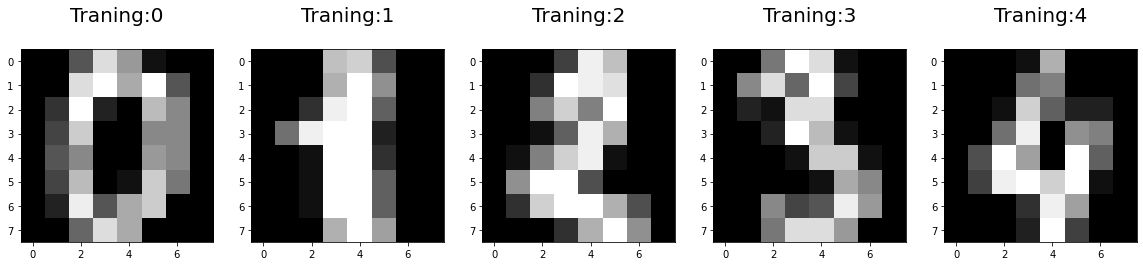

In [54]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Traning:%i\n'%label,fontsize=20)

In [55]:
import seaborn as sns

In [56]:
cm = metrics.confusion_matrix(y_test,preds)
print(cm)

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


Text(0.5, 1.0, '0.9648148148148148')

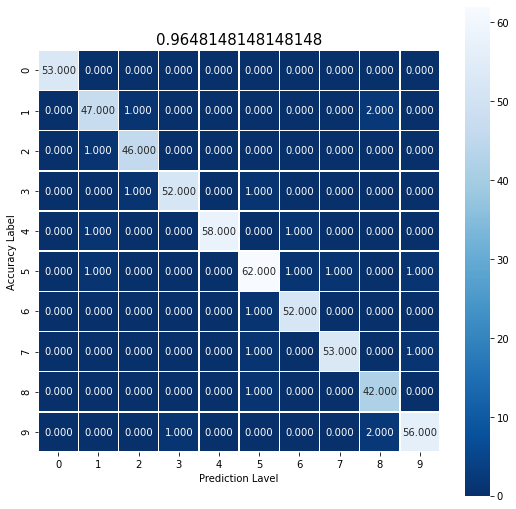

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',linewidths=0.5,square=True,cmap='Blues_r')
plt.ylabel('Accuracy Label')
plt.xlabel('Prediction Lavel')
plt.title(reg.score(x_test,y_test),size=15)

<IPython.core.display.Javascript object>

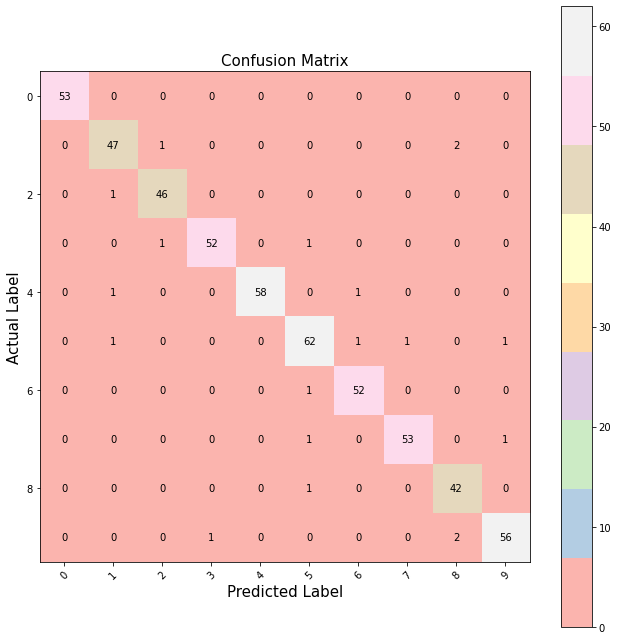

In [58]:
plt.figure(figsize=(9,9))
plt.imshow(cm,interpolation='nearest',cmap='Pastel1')
plt.title('Confusion Matrix',size=15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks,['0','1','2','3','4','5','6','7','8','9'],rotation=45,size=10)
plt.tight_layout()
plt.ylabel('Actual Label',size=15)
plt.xlabel('Predicted Label',size=15)
width,height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]),xy=(y,x),
            horizontalalignment='center',verticalalignment='center')